# Projeto diabetes

O diabetes é uma doença crônica grave na qual os indivíduos perdem a capacidade de regular efetivamente os níveis de glicose no sangue e pode levar a uma redução na qualidade de vida e na expectativa de vida.

O Sistema de Vigilância de Fatores de Risco Comportamentais (BRFSS) é uma pesquisa telefônica relacionada à saúde que é coletada anualmente pelo CDC (Centro de Controle e Prevenção de Doenças dos Estados Unidos). A cada ano, a pesquisa coleta respostas de milhares de americanos sobre comportamentos de risco relacionados à saúde, condições crônicas de saúde e o uso de serviços preventivos. Para este projeto, foi utilizado conjunto de dados disponível no Kaggle para o ano de 2015.

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

Dicionário de dados:

- `Diabetes_binary`: 0 = sem diabetes, 1 = com diabetes
- `HighBP`: 0 = sem pressão alta, 1 = com pressão alta
- `HighChol`: 0 = sem colesterol alto, 1 = com colesterol alto
- `CholCheck`: 0 = não fez exame de colesterol na vida, 1 = fez exame de colesterol alguma vez
- `BMI`: Índice de Massa Corporal (IMC)
- `Smoker`: 0 = não fumante, 1 = fumante
- `Stroke`: 0 = sem histórico de AVC, 1 = com histórico de AVC
- `HeartDiseaseorAttack`: 0 = sem histórico de doença cardíaca ou ataque cardíaco, 1 = com histórico de doença cardíaca ou ataque cardíaco
- `PhysActivity`: 0 = não pratica atividade física, 1 = pratica atividade física
- `Fruits`: 0 = não consome frutas, 1 = consome frutas
- `Veggies`: 0 = não consome vegetais, 1 = consome vegetais
- `HvyAlcoholConsump`: 0 = não consome álcool em altas quantidades, 1 = consome álcool em altas quantidades
- `AnyHealthcare`: 0 = não tem plano de saúde, 1 = tem plano de saúde
- `NoDocbcCost`: 0 = não deixou de ir ao médico por questões financeiras, 1 = deixou de ir ao médico por questões financeiras (últimos 12 meses)
- `GenHlth`: Saúde geral (1 a 5) - 1 = Excelente, 2 = Muito boa, 3 = Boa, 4 = Aceitável, 5 = Ruim
- `MentHlth`: Nos últimos 30 dias, quantos dias a saúde mental não foi boa (0 a 30)
- `PhysHlth`: Nos últimos 30 dias, quantos dias a saúde física não foi boa (0 a 30)
- `DiffWalk`: 0 = não tem dificuldade para caminhar, 1 = tem dificuldade para caminhar
- `Sex`: 0 = feminino, 1 = masculino
- `Age`: Idade em faixas 1 = 18-24; 2 = 25-29; 3 = 30-34; 4 = 35-39; 5 = 40-44; 6 = 45-49; 7 = 50-54; 8 = 55-59; 9 = 60-64; 10 = 65-69; 11 = 70-74; 12 = 75-79; 13 = 80+
- `Education`: Níveis de ensino 1 = nunca frequentou a escola; 2 = escola primária; 3 = escola secundária incompleta ; 4 = escola secundária; 5 = faculdade incompleta ou curso técnico; 6 = completou faculdade ou diplomas superiores
- `Income`: Renda anual em faixas 1 = < 10.000; 2 = 10.000-14.999; 3 = 15.000-19.999; 4 = 20.000-24.999; 5 = 25.000-34.999; 6 = 35.000-49.999; 7 = 50.000-74.999; 8 = 75.000+

##Importações e ajustes iniciais

In [40]:
# Frameworks
import numpy as np
import pandas as pd

# Gráficas
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Estatísticas
from scipy.stats import ttest_ind, chi2_contingency

# Configurações
from src.config import DADOS_TRATADOS

# Avisos
import warnings

In [41]:
warnings.filterwarnings('ignore')

In [42]:
# Ajustes casas decimais no pandas
pd.options.display.float_format = '{:,.2f}'.format

In [43]:
# Definição da paleta de cores
paleta = ['#5A189A', '#D81159', '#4C1E4F', '#DA627D','#5E548E', '#479D94', '#55396F', '#F08080','#023E7D', '#427AA1']

In [44]:
# Layout
sns.set_theme(style='darkgrid', context='notebook', palette=paleta)

In [45]:
df_diabetes = pd.read_parquet(DADOS_TRATADOS)

##Verificação dos dados

Carregamento da base de dados e verificação do início e fim da tabela para ver se o carregamento foi feito com sucesso.

In [46]:
with pd.option_context("display.max_columns", None):
    display(df_diabetes.head())

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No,Yes,No,Yes,26,No,No,No,Yes,No,Yes,No,Yes,No,Good,5,30,No,Masc,35-39,College,75k+
1,No,Yes,Yes,Yes,26,Yes,Yes,No,No,Yes,No,No,Yes,No,Good,0,0,No,Masc,75-79,College,75k+
2,No,No,No,Yes,26,No,No,No,Yes,Yes,Yes,No,Yes,No,Excellent,0,10,No,Masc,80+,College,75k+
3,No,Yes,Yes,Yes,28,Yes,No,No,Yes,Yes,Yes,No,Yes,No,Good,0,3,No,Masc,70-74,College,75k+
4,No,No,No,Yes,29,Yes,No,No,Yes,Yes,Yes,No,Yes,No,Very good,0,0,No,Fem,55-59,College inc.,75k+


In [47]:
with pd.option_context("display.max_columns", None):
    display(df_diabetes.tail())

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70687,Yes,No,Yes,Yes,37,No,No,No,No,No,Yes,No,Yes,No,Fair,0,0,No,Fem,45-49,High schl.,< 10k
70688,Yes,No,Yes,Yes,29,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Very good,0,0,Yes,Masc,65-69,High schl. inc.,< 50k
70689,Yes,Yes,Yes,Yes,25,No,No,Yes,No,Yes,No,No,Yes,No,Poor,15,0,Yes,Fem,80+,College,< 25k
70690,Yes,Yes,Yes,Yes,18,No,No,No,No,No,No,No,Yes,No,Fair,0,0,Yes,Fem,70-74,Element.,< 25k
70691,Yes,Yes,Yes,Yes,25,No,No,Yes,Yes,Yes,No,No,Yes,No,Very good,0,0,No,Fem,60-64,College,< 15k


In [48]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Diabetes_binary       70692 non-null  category
 1   HighBP                70692 non-null  category
 2   HighChol              70692 non-null  category
 3   CholCheck             70692 non-null  category
 4   BMI                   70692 non-null  int64   
 5   Smoker                70692 non-null  category
 6   Stroke                70692 non-null  category
 7   HeartDiseaseorAttack  70692 non-null  category
 8   PhysActivity          70692 non-null  category
 9   Fruits                70692 non-null  category
 10  Veggies               70692 non-null  category
 11  HvyAlcoholConsump     70692 non-null  category
 12  AnyHealthcare         70692 non-null  category
 13  NoDocbcCost           70692 non-null  category
 14  GenHlth               70692 non-null  category
 15  Me

##Exploração dos dados

Nesta seção serão feitas diversas análises com o intuito de entender a base de dados e encontrar possíveis sugestões de resultados relevantes.

In [49]:
colunas_numericas = df_diabetes.select_dtypes(include='number').columns.tolist()
coluna_alvo = ['Diabetes_binary']
colunas_categoricas = df_diabetes.select_dtypes(include='category').columns.tolist()
colunas_categoricas.remove(coluna_alvo[0])
colunas_binarias = df_diabetes.nunique()[df_diabetes.nunique() == 2].index.tolist()
colunas_binarias.remove(coluna_alvo[0])
colunas_nao_binarias = list(set(colunas_categoricas) - set(colunas_binarias))

In [50]:
df_diabetes.describe()

,BMI,MentHlth,PhysHlth
count,"70,692.00","70,692.00","70,692.00"
mean,29.86,3.75,5.81
std,7.11,8.16,10.06
min,12.00,0.00,0.00
25%,25.00,0.00,0.00
50%,29.00,0.00,0.00
75%,33.00,2.00,6.00
max,98.00,30.00,30.00


Para os valores numéricos, tem-se a impressão inicial que BMI, como já visto acima, possui valores muito extremos que talvez sejam considerados ouliers, tanto estatisticamente quanto em relação ao significado do BMI. Para saúde mental e física, aparentemente a maior parte das pessoas avaliam não ter havido problema nos últimos 30 dias, também podendo haver outliers próximo aos valores máximos.

In [51]:
df_diabetes.describe(exclude='number')

,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income
count,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,5,2,2,13,6,8
top,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,Good,No,Fem,65-69,College,75k+
freq,35346,39832,37163,68943,37094,66297,60243,49699,43249,55760,67672,67508,64053,23427,52826,38386,10856,26020,20646


Em uma avaliação inicial dos valores categóricos, observa-se principalmente que a maioria das pessoas:
- Fez exame de colesterol alguma vez (`CholCheck`)
- Não possui histórico de AVC (`Stroke`)
- Não possui histórico de doença cardíaca ou ataque cardíaco (`HeartDiseaseorAttack`)
- Consome vegetais (`Veggies`)
- Não consome álcool em grandes quantidades (`HvyAlcoholConsump`)
- Possui plano de saúde (`AnyHealthcare`)
- Não deixou de ir ao médico nos últimos 12 meses por conta de questões financeiras (`NoDocbcCost`)
- Considera sua saúde como Boa (`GenHlth`)
- Não possui dificuldade para caminhar (`DiffWalk`)
- Está na faixa dos 65 a 69 anos (`Age`)
- Completou a faculdade ou possui diplomas superiores (`Education`)
- Possui renda anual de $75.000 ou mais (`Income`)

As demais colunas parecem mais bem distribuídas em relação a quantidade de valores em suas categorias.

###Variáveis numéricas

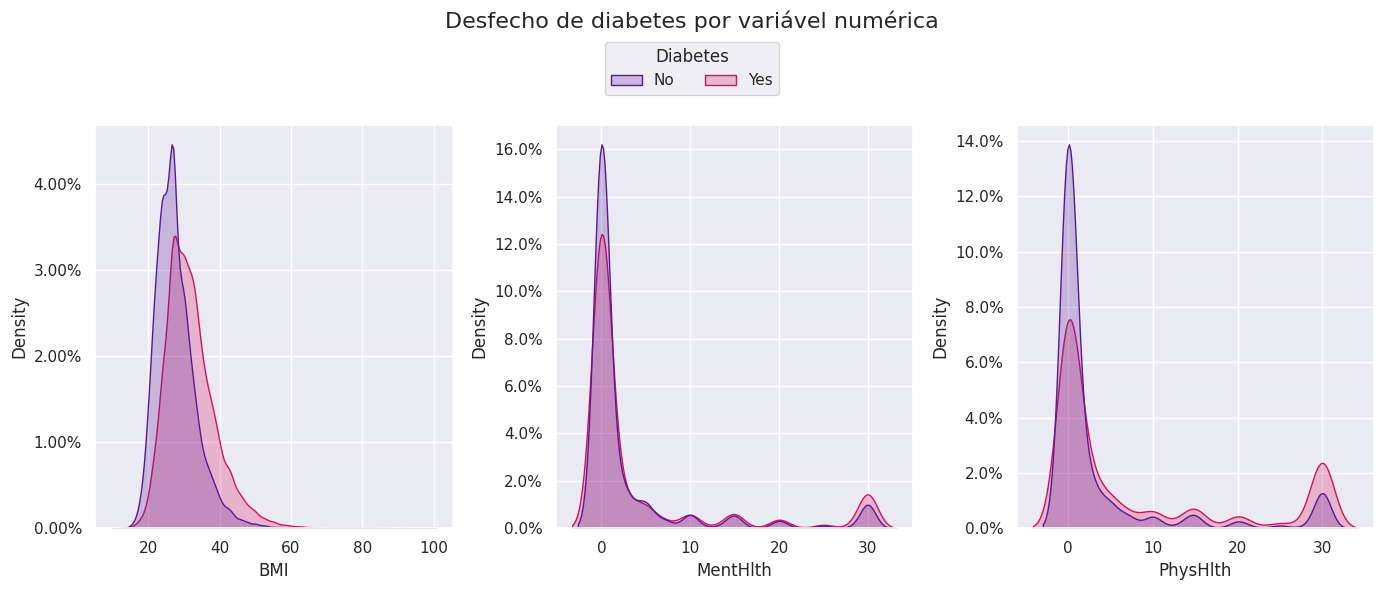

In [53]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 6), tight_layout=True)
for i, coluna in enumerate(colunas_numericas):
  kde = sns.kdeplot(x=coluna, data=df_diabetes, hue=coluna_alvo[0], ax=axs[i], fill=True)
  kde.yaxis.set_major_formatter(PercentFormatter(1))
  legenda = kde.get_legend()
  legenda.remove()

rotulos = [text.get_text() for text in legenda.get_texts()]
fig.legend(handles=legenda.legend_handles, labels=rotulos, loc='upper center', ncols=2, title='Diabetes', bbox_to_anchor=(0.5, 0.94))
fig.suptitle('Desfecho de diabetes por variável numérica\n\n\n', fontsize=16)
fig.align_labels()
plt.show()

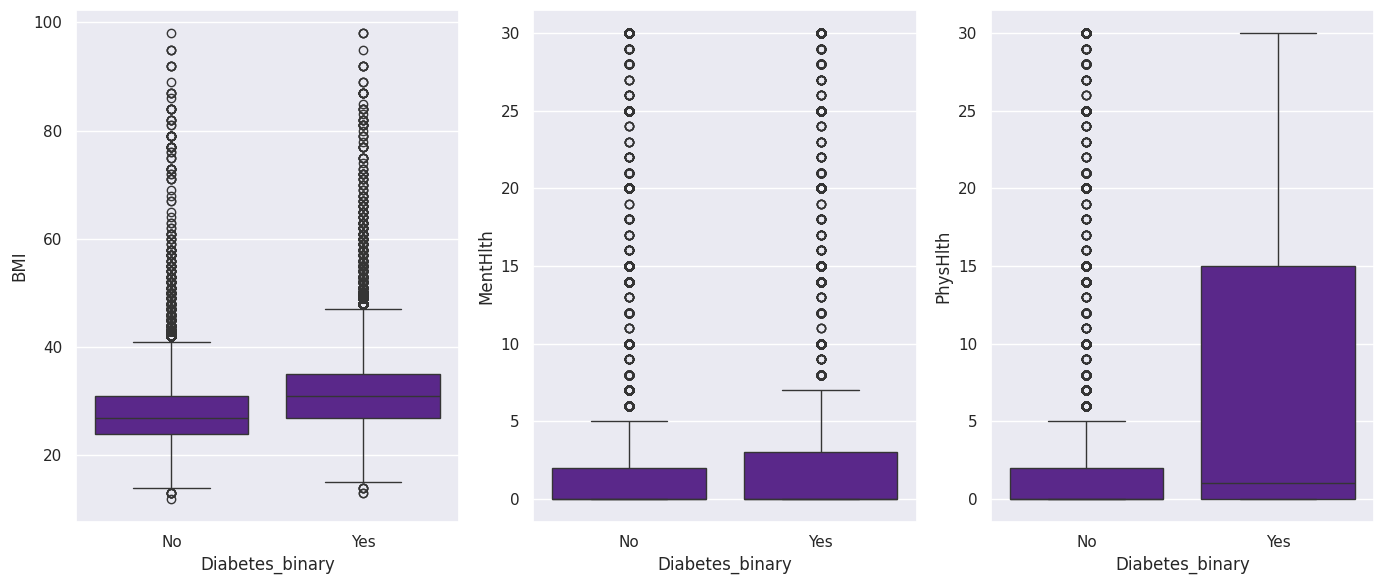

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 6), tight_layout=True)

for ax, coluna in zip(axs, colunas_numericas):
  sns.boxplot(data=df_diabetes, x=coluna_alvo[0], y=coluna, ax=ax)

plt.show()

In [55]:
df_diabetes.groupby(coluna_alvo, observed=False).describe().T

Diabetes_binary        No       Yes
BMI      count  35,346.00 35,346.00
         mean       27.77     31.94
         std         6.19      7.36
         min        12.00     13.00
         25%        24.00     27.00
         50%        27.00     31.00
         75%        31.00     35.00
         max        98.00     98.00
MentHlth count  35,346.00 35,346.00
         mean        3.04      4.46
         std         7.21      8.95
         min         0.00      0.00
         25%         0.00      0.00
         50%         0.00      0.00
         75%         2.00      3.00
         max        30.00     30.00
PhysHlth count  35,346.00 35,346.00
         mean        3.67      7.95
         std         8.10     11.30
         min         0.00      0.00
         25%         0.00      0.00
         50%         0.00      1.00
         75%         2.00     15.00
         max        30.00     30.00

In [56]:
corr_matrix = df_diabetes.corr(numeric_only=True).style.format(precision=2).background_gradient(cmap='coolwarm', vmin=-1, vmax=1)
corr_matrix

,BMI,MentHlth,PhysHlth
BMI,1.00,0.10,0.16
MentHlth,0.10,1.00,0.38
PhysHlth,0.16,0.38,1.00


Nota-se que a distribuição de valores entre pessoas sem e com diabetes parece bem similar. As pessoas com diabetes apresentam um discreto aumento de BMI e alguns dias a mais  com problemas com saúde física e mental. Além disso, é possível verificar a presença de muitos outliers. A correlação entre as colunas numéricas também não é muito forte.

Para avaliar se essas diferenças são realmente significativas, devemos realizar testes de hipótese. Porém, como a base é muito grande, é preferível inferir a normalidade ou não a partir de gráficos. Além disso, para bases grandes, alguns testes aceitam uma distribuição próxima à normal mesmo que haja pequenas distorções que não gerem uma distribuição normal perfeita.

In [57]:
df_diabetes.groupby(coluna_alvo, observed=False).skew(numeric_only=True)

,BMI,MentHlth,PhysHlth
Diabetes_binary,,,
No,2.23,2.81,2.48
Yes,1.53,2.07,1.15


In [58]:
df_diabetes.groupby(coluna_alvo, observed=False)[colunas_numericas].apply(pd.DataFrame.kurtosis)

,BMI,MentHlth,PhysHlth
Diabetes_binary,,,
No,12.90,7.01,4.91
Yes,5.72,2.87,-0.34


Como a coluna de IMC é a menos assimétrica e se parece mais com uma distribuição normal, podemos utilizar um teste t para verificar se pessoas com diabetes normalmente possuem IMC maior que pessoas sem diabetes.

In [59]:
dados_imc_sim = df_diabetes.query("Diabetes_binary == 'Yes'")["BMI"].values
dados_imc_nao = df_diabetes.query("Diabetes_binary == 'No'")["BMI"].values

In [60]:
ttest_ind(dados_imc_sim, dados_imc_nao, alternative='greater', nan_policy='omit')

TtestResult(statistic=81.59089746755323, pvalue=0.0, df=70690.0)

Nota-se que há uma diferença estatisticamente significativa, indicando que pessoas com diabetes normalmente possuem IMC maior que pessoas sem diabetes.

Porém, como há presença de muitos outliers, é importante verificar se eles estão interferindo neste  resultado.

In [61]:
def remove_outliers(dados, largura_bigodes=1.5):
  """
  Remove outliers de uma dada Series.

  Parâmetros
  ----------
  dados: pd.Series
    Series (normalmente uma coluna de um Dataframe) a qual deve ter os outliers removidos.
  largura_bigodes (opcional): valor utilizado na conta para definir os valores máximo e mínimo para o limite de outliers. Por padrão é 1,5.

  Retornos
  --------
  pd.Series
    Series (coluna do dataframe) inicial com os outliers removidos.
  """
  q1 = dados.quantile(0.25)
  q3 = dados.quantile(0.75)
  iqr = q3 - q1
  return dados[(dados >= q1 - largura_bigodes * iqr) & (dados <= q1 + largura_bigodes * iqr)]

In [62]:
dados_imc_sim_sem_outliers = remove_outliers(pd.Series(dados_imc_sim))
dados_imc_nao_sem_outliers = remove_outliers(pd.Series(dados_imc_nao))

In [63]:
df_imc_sem_outliers = pd.DataFrame({"Sim": dados_imc_sim_sem_outliers, "Não": dados_imc_nao_sem_outliers})

In [64]:
df_imc_sem_outliers.skew()

,0
Sim,-0.03
Não,0.03


In [65]:
df_imc_sem_outliers.kurtosis()

,0
Sim,-0.58
Não,-0.61


In [66]:
ttest_ind(dados_imc_sim_sem_outliers, dados_imc_nao_sem_outliers, alternative='greater', nan_policy='omit')

TtestResult(statistic=105.48164777147183, pvalue=0.0, df=62203.0)

É possível verificar que mesmo após a remoção dos outliers há uma diferença estatisticamente significativa, indicando que pessoas com diabetes normalmente possuem IMC maior que pessoas sem diabetes.

###Variáveis categóricas

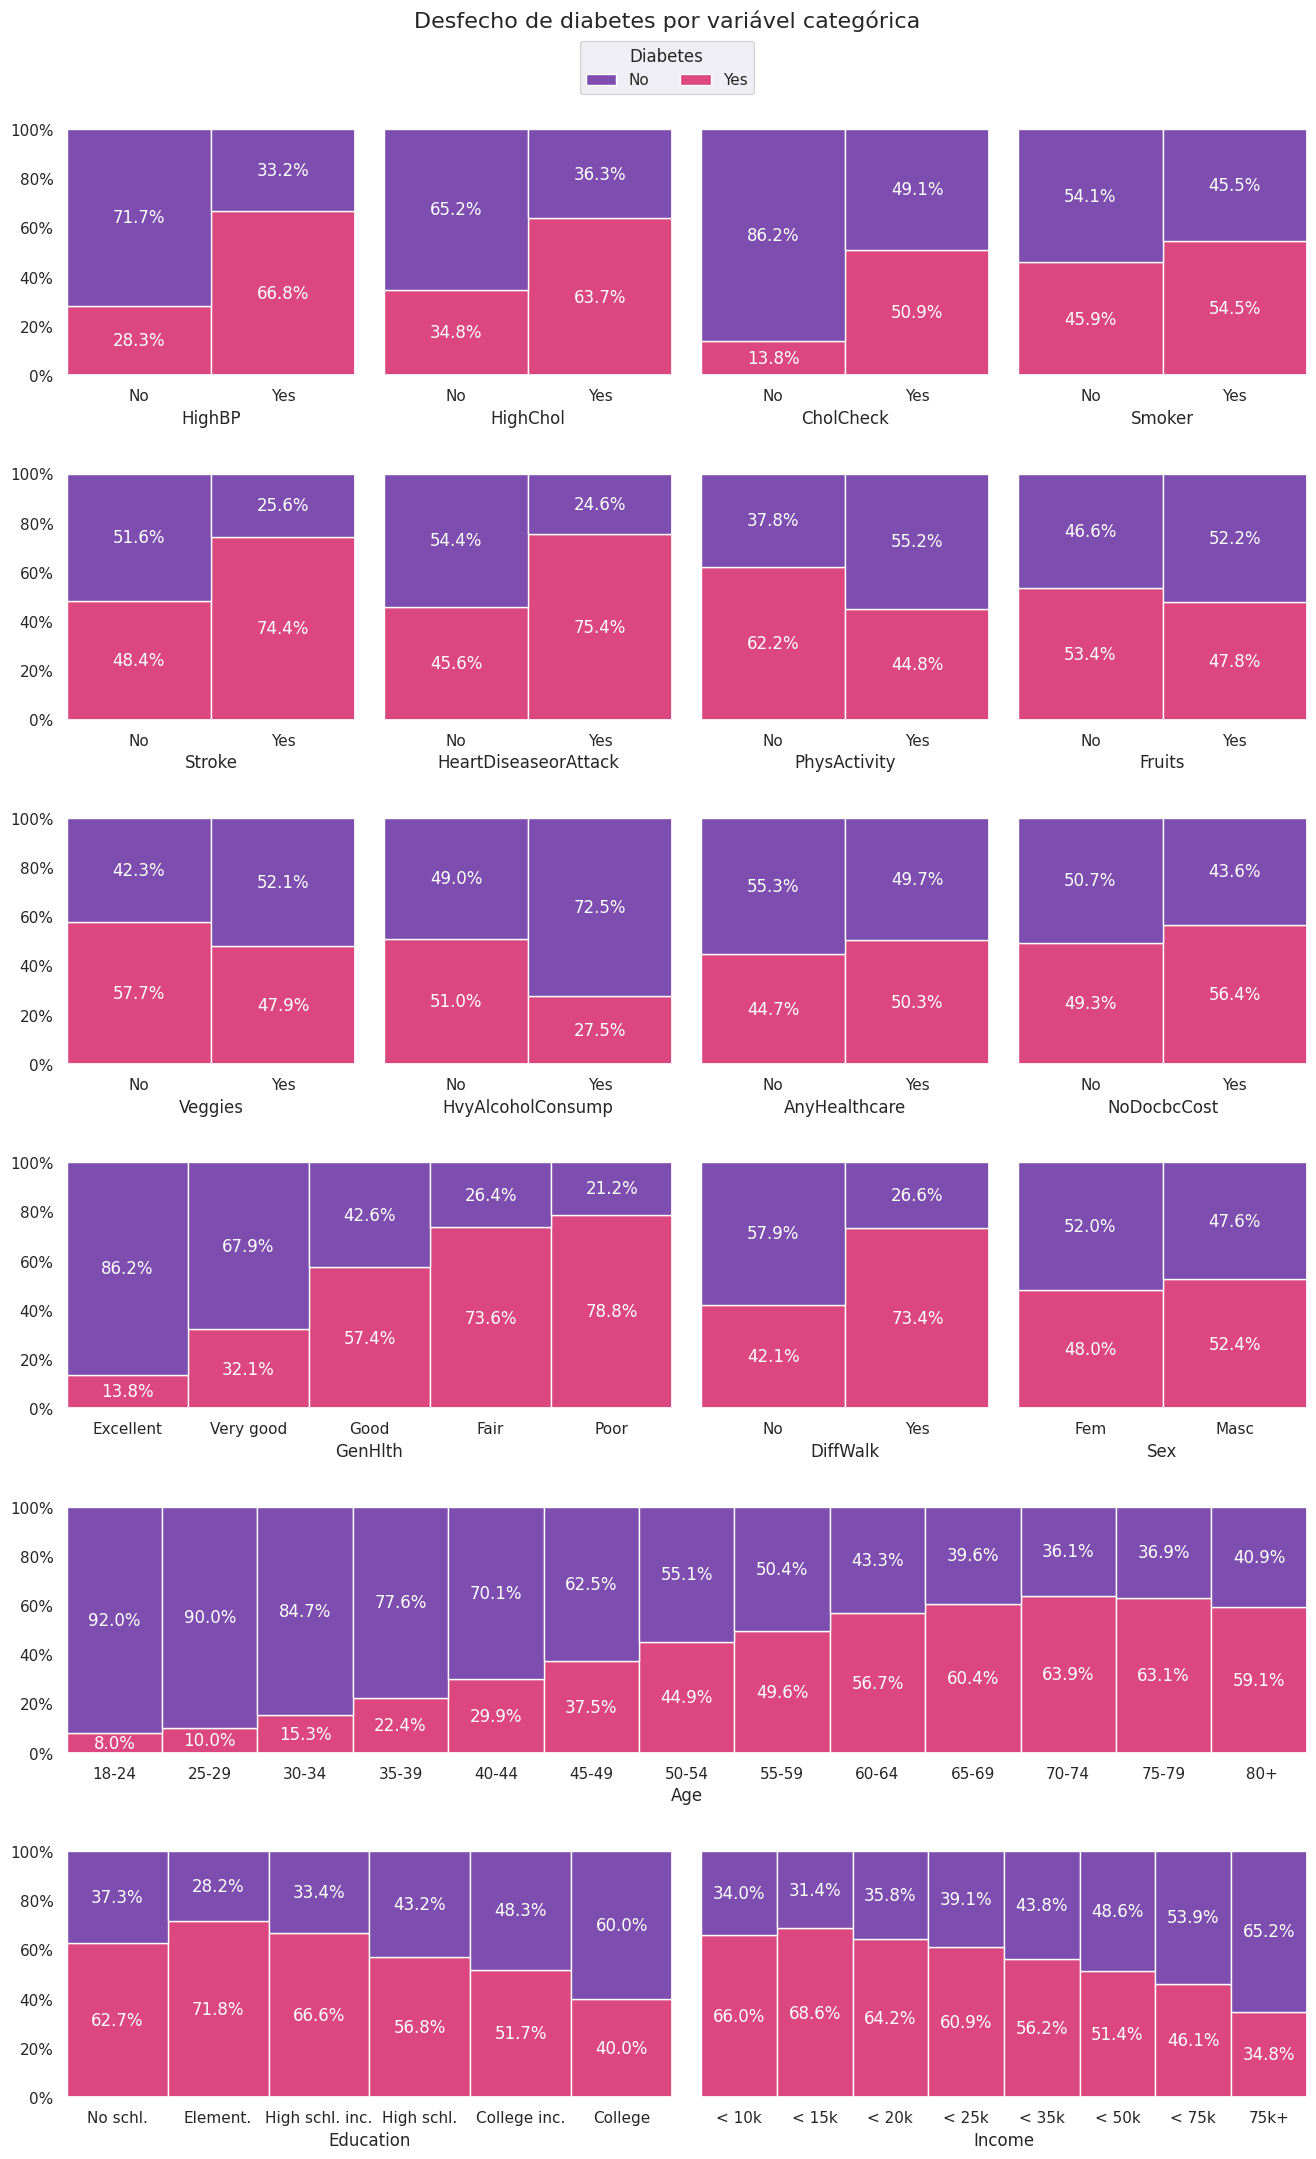

In [72]:
mosaico = 'ABCD;EFGH;IJKL;MMNO;PPPP;QQRR'
fig = plt.figure(figsize=(16, 24))
axs = fig.subplot_mosaic(mosaico, sharey=True)

for i, coluna in enumerate(colunas_categoricas):
  letras = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R'}
  hist = sns.histplot(x=coluna, data=df_diabetes, hue=coluna_alvo[0], multiple='fill', ax=axs[letras[i]], stat='percent', common_norm=True)
  hist.grid(False)

  hist.yaxis.set_major_formatter(PercentFormatter(1))
  hist.set_ylabel('')
  hist.set_xticks(df_diabetes[coluna].unique(), df_diabetes[coluna].unique())

  for barra in hist.containers:
    hist.bar_label(barra, label_type='center', labels=[f'{particao.get_height():.1%}' for particao in barra], color='white')

  legenda = hist.get_legend()
  legenda.remove()

rotulos = [text.get_text() for text in legenda.get_texts()]
fig.legend(handles=legenda.legend_handles, labels=rotulos, loc='upper center', ncols=2, title='Diabetes', bbox_to_anchor=(0.5, 0.97))
fig.suptitle('Desfecho de diabetes por variável categórica', fontsize=16)
fig.align_labels()
plt.subplots_adjust(wspace=0.1, hspace=0.4, top=0.93)

Pelos gráficos apresentados é possível observar que entre as pessoas com diabetes, há maior porcentagem de pessoas com:
- Pressão sanguínea alta;
- Colesterol alto;
- Histórico de AVC;
- Evento anterior de ataque cardíaco ou doenças cardíacas;
- Ausência de atividade física;
- Baixo consumo de álcool;
- Dificuldade para caminhar;
- Piores condições gerais de saúde;
- Idades mais avançadas;
- Menores níveis de escolaridade;
- Menores valores de renda anual.


Para avaliar se essas diferenças observadas são estatisticamente significantes, podem ser realizados testes estatísticos.

In [68]:
tabelas_contingencia = {}

for coluna in df_diabetes.select_dtypes('category').columns:
  if coluna != coluna_alvo[0]:
    tabelas_contingencia[coluna] = pd.crosstab(df_diabetes[coluna_alvo[0]], df_diabetes[coluna])

In [69]:
for coluna, tabela in tabelas_contingencia.items():
  chi2, valor_p, _, _ = chi2_contingency(tabela)
  print(f'{coluna}: estatítica={chi2} e valor p={valor_p}.\n')

HighBP: estatítica=10287.972984997781 e valor p=0.0.

HighChol: estatítica=5911.8066998822505 e valor p=0.0.

CholCheck: estatítica=939.6317718798653 e valor p=2.3798712773419562e-206.

Smoker: estatítica=522.4810772937883 e valor p=1.2211053080400827e-115.

Stroke: estatítica=1111.0793074560897 e valor p=1.290837098922016e-243.

HeartDiseaseorAttack: estatítica=3161.7202445322782 e valor p=0.0.

PhysActivity: estatítica=1778.9607035956992 e valor p=0.0.

Fruits: estatítica=206.50090830615105 e valor p=7.967064756507964e-47.

Veggies: estatítica=444.0806516898606 e valor p=1.4007103685991128e-98.

HvyAlcoholConsump: estatítica=635.0865339749427 e valor p=3.9133962745676324e-140.

AnyHealthcare: estatítica=37.79561046998934 e valor p=7.855833890083924e-10.

NoDocbcCost: estatítica=118.4167174482265 e valor p=1.4053255735064045e-27.

GenHlth: estatítica=12304.318979903528 e valor p=0.0.

DiffWalk: estatítica=5253.694843161374 e valor p=0.0.

Sex: estatítica=139.26185542886512 e valor p=3

A partir desses dados é possível perceber que para todas as colunas categóricas há pelo menos uma categoria significativamente diferente das demais em relação ao desfecho de diabetes. Porém, deve haver precaução nessa intterpretação, pois a base é grande e pequenas variações podem ser acumuladas e levar a uma diferença significativa.

Além disso, podemos avaliar a correlação entre as variáveis.

In [70]:
corr_categoricas = df_diabetes.select_dtypes('category').apply(lambda coluna: coluna.cat.codes).corr(method='spearman', numeric_only=False)

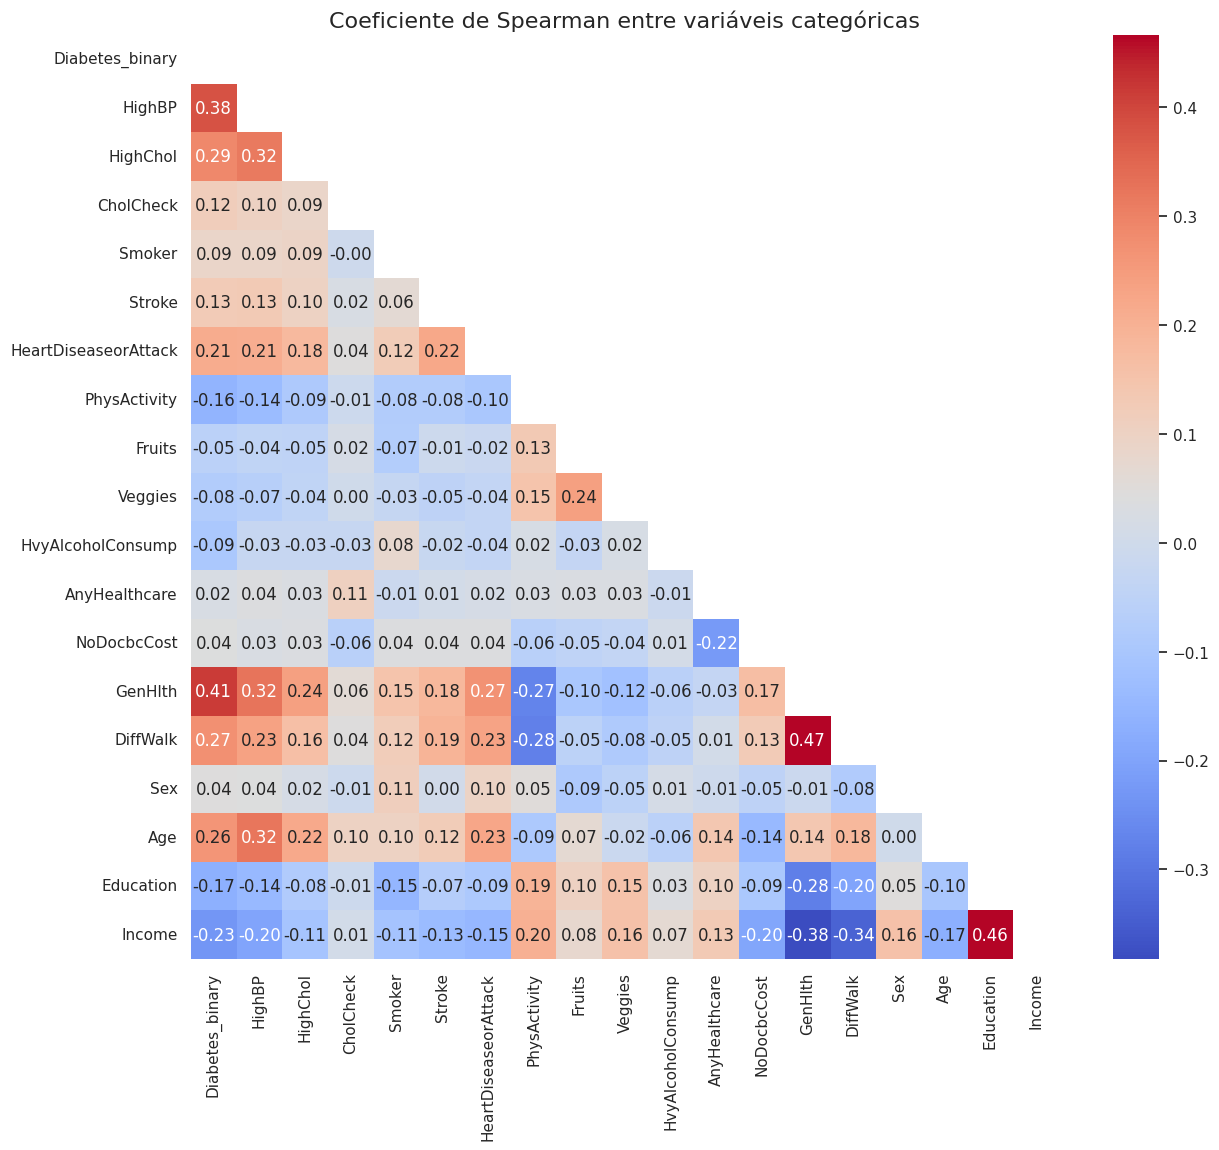

In [71]:
fig, ax = plt.subplots(figsize=(14, 12))
matriz = np.triu(corr_categoricas)
corr = sns.heatmap(corr_categoricas, mask=matriz, annot=True, fmt='.2f', ax=ax, cmap='coolwarm')
corr.grid(False)
ax.set_facecolor('white')
plt.title('Coeficiente de Spearman entre variáveis categóricas', fontsize=16)
plt.show()

Em relação à variável alvo, não há muitas correlações fortes. A mais forte é em relação à saúde geral (quanto pior a saúde geral, maior a chance da pessoa ter dibetes, ou quando a pessoa tem diabetes, maior a chance da saúde geral dela ser pior), seguida de pressão sanguínea elevada (quando a pessoa tem pressão alta, na maioria das vezes também tem diabetes, ou vice-versa).

Algumas outras correlações positivas que podem ser relevantes são relacionadas à variável alvo e colesterol alto, dificuldade para andar e idade.

Além disso, também é possível observar que quanto maior o nível de educação, maior a renda anual.

Também parece haver uma leve correlação negativa entre renda e desfecho de diabetes.